# Homework 1

**The following notebook is meant to help you work through Problems 1, 2, and 3 on Homework 1. You are by no means required to use it, nor are you required to fill out/use any of the boilerplate code/functions. You are welcome to implement the functions however you wish.**

In [192]:
# loading data

import numpy as np
import matplotlib.pyplot as plt
from cmath import exp
train_data = np.genfromtxt("data/earth_temperature_sampled_train.csv", delimiter = ',')
year_train = train_data[:, 0] / 1000
temp_train = train_data[:, 1]
test_data = np.genfromtxt("data/earth_temperature_sampled_test.csv", delimiter = ',')
year_test = test_data[:, 0] / 1000
temp_test = test_data[:, 1]

from T1_P1_TestCases import test_p1
from T1_P2_TestCases import test_p2

# Problem 1

## Problem 1 Subpart 1

In [193]:
def kernel(x, tau, x_train):
    """
    Compute f_tau(x) with parameter tau.
    
    :param x: value on which to do prediction
    :param float tau: lengthscale parameter
    :param x_train: the x coordinates of the training set
    :return: f(x), where f is calculated wrt to the training data and tau
    """
    return np.exp(-np.power((x_train - x), 2) / tau)

def kernel_regressor(x_new, tau, x_train, y_train):
    """
    Run f_tau(x) with parameter tau on every entry of x_array.

    :param x_new: a numpy array of x_values on which to do prediction. Shape is (n,)
    :param float tau: lengthscale parameter
    :param x_train: the x coordinates of the training set
    :param y_train: the y coordinates of the training set
    :return: if x_array = [x_1, x_2, ...], then return [f(x_1), f(x_2), ...]
             where f is calculated wrt to the training data and tau
    """
    # TODO: implement this
    assert(len(x_train) == len(y_train))
    y_new = np.array([])
    for x in x_new:
        num = np.dot(kernel(x, tau, x_train), y_train)
        denom = np.sum(kernel(x, tau, x_train))
        y_new = np.append(y_new, [num / denom])
    return y_new

In [194]:
test_p1(kernel_regressor)

Passed


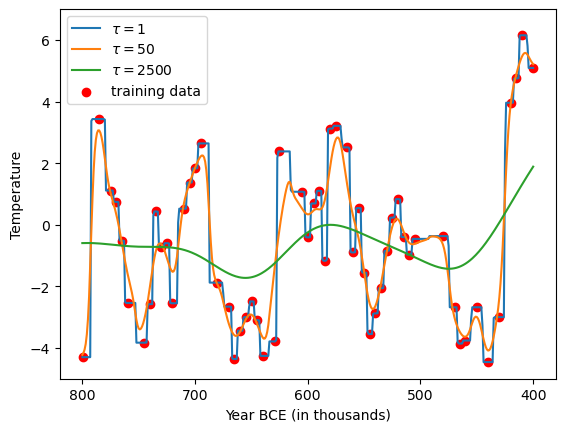

In [195]:
# plot functions
x_array = np.arange(400, 800 + 1, 1)
for tau in [1, 50, 2500]:
    plt.plot(x_array, kernel_regressor(x_array, tau, year_train, temp_train), label = f"$\\tau = {tau}$")
plt.scatter(year_train, temp_train, label = "training data", color = "red")
plt.legend()
plt.xticks(np.arange(400, 800 + 100, 100))
plt.ylabel("Temperature")
plt.xlabel("Year BCE (in thousands)")
plt.ylim([-5,7])

plt.gca().invert_xaxis()
# figure should be in your directory now, with name p1.2.png
plt.savefig("images/p1.2.png", bbox_inches = "tight")
plt.show()

## Problem 1 Subpart 4

In [196]:
def model_mse(predictions, true):
    """
    Calculate the MSE for the given model predictions, with respect to the true values

    :param predictions: predictions given by the model
    :param true: corresponding true values
    :return: the mean squared error
    """
    # TODO: implement this
    return np.mean(np.square(true - predictions))

In [197]:
for tau in [1, 50, 2500]:
    print(f"tau = {tau}: loss = {model_mse(kernel_regressor(year_test, tau, year_train, temp_train), temp_test)}")

tau = 1: loss = 1.9472621565209178
tau = 50: loss = 1.858289916961345
tau = 2500: loss = 8.333886806980791


# Problem 2

## Problem 2 Subpart 1

In [198]:
def predict_knn(x_new, k, x_train, y_train):
    """
    Returns predictions for the values in x_test, using KNN predictor with the specified k.

    :param x_new: a numpy array of x_values on which to do prediction. Shape is (n,)
    :param k: number of nearest neighbors to consider
    :param x_train: x coordinates of training dataset
    :param y_train: y coordinates of training dataset

    :return: if x_array = [x_1, x_2, ...], then return [f(x_1), f(x_2), ...]
             where f is the kNN with specified parameters and training set
    """
    assert(len(x_train) == len(y_train))
    
    y_new = np.array([])
    tau = 2500
    for x in x_new:
        distances = kernel(x, tau, x_train)
        sorted_distances, sorted_y_train = zip(*sorted(zip(distances, y_train), reverse=True))
        y_new = np.append(y_new, [np.mean(np.array(sorted_y_train)[:k])])
    return y_new

In [199]:
test_p2(predict_knn)

Passed


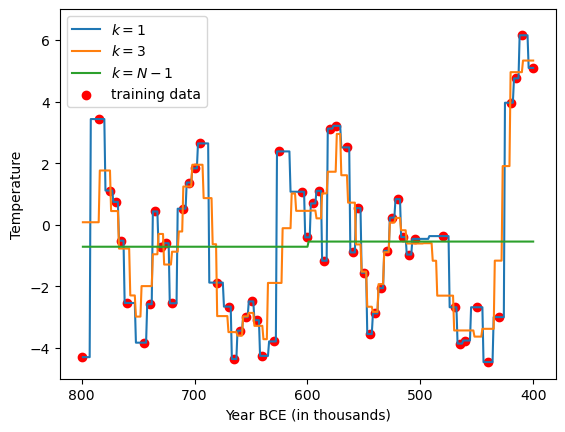

In [200]:
# plot functions
N = year_train.shape[0]
x_array = np.arange(400, 800, 1)
plt.plot(x_array, predict_knn(x_array, 1, year_train, temp_train), label = "$k = 1$")
plt.plot(x_array, predict_knn(x_array, 3, year_train, temp_train), label = "$k = 3$")
plt.plot(x_array, predict_knn(x_array, N - 1, year_train, temp_train), label = "$k = N - 1$")
plt.scatter(year_train, temp_train, label = "training data", color = "red")
plt.ylabel("Temperature")
plt.xlabel("Year BCE (in thousands)")

plt.legend()
plt.xticks(np.arange(400, 900, 100))
plt.ylim([-5,7])

plt.gca().invert_xaxis()
# figure should be in your directory now, with name p2.1.png
plt.savefig("images/p2.1.png", bbox_inches = "tight")
plt.show()

## Problem 2 Subpart 4

In [201]:
# choose your value of k and calculate the loss
for k in [1, 3, 55]:
    print(model_mse(predict_knn(year_test, k, year_train, temp_train), temp_test))

1.7406000000000004
3.890766222222222
9.66397324033058


# Problem 3

## Problem 3 Subpart 1

In [202]:
## don't change anything here
def f_scale(X, part = "a"):
    if part == "a":
        X = X/181 # 181000
    elif part == "b":
        X = X/4e2 # 4e5
    elif part == "c":
        X = X/1.81 # 1810     
    elif part == "d":
        X = X/.181 # 181
    return X
###

In [203]:
# TODO: Complete this `make_basis` function according to the above
# specifications. The function should return the array `phi(X)`
def make_basis(X,part='a'):
    """
    Args:
      X: input of years (or any variable you want to turn into the appropriate basis) as
        ndarray with length `N`.
      part: one of `a`, `b`, `c`, `d` depending on the basis function.

    Returns:
      ndarray `phi(X)` of shape `(N,D)`. For each part the shapes of your
      training data `make_basis(years_train)` should be
        (a) 57x10, (b) 57x10, (c) 57x10, (d) 57x50.
    """

    phi_X = []
    ### DO NOT CHANGE THIS SECTION 
    ### it is to prevent numerical instability from taking the exponents of
    ### the years, as well as break symmetry when dealing with a Fourier basis.
    X = f_scale(X, part)
    ### end section

    if part == 'a':
        # TODO: Implement this
        try:
            for x in X:
                phi_X = np.append(phi_X, [np.append([1], [np.power(x, j) for j in range(1, 10)])])
            return np.reshape(phi_X, (len(X), 10))
        except TypeError:
            return np.append([1], [np.power(X, j) for j in range(1, 10)])

    elif part=='b':
        try:
            for x in X:
                phi_X = np.append(phi_X, [np.append([1], [np.exp(-np.power(x - (j + 7)/8, 2)/5) for j in range(1, 10)])])
            return np.reshape(phi_X, (len(X), 10))
        except TypeError:
            return np.append([1], [np.exp(-np.power(X - (j + 7)/8, 2)/5) for j in range(1, 10)])
        
    elif part=='c':
        try:
            for x in X:
                phi_X = np.append(phi_X, [np.append([1], [np.cos(x/j) for j in range(1, 10)])])
            return np.reshape(phi_X, (len(X), 10))
        except TypeError:
            return np.append([1], [np.cos(X/j) for j in range(1, 10)])

    elif part=='d':
        try:
            for x in X:
                phi_X = np.append(phi_X, [np.append([1], [np.cos(x/j) for j in range(1, 50)])])
            return np.reshape(phi_X, (len(X), 50))
        except TypeError:
            return np.append([1], [np.cos(X/j) for j in range(1, 50)])
                                        

We are now solving the multi-dimensional OLS regression problem. For each $i=1,\ldots, N$, we have 
$$ \hat y_i = \mathbf{w}^\top\mathbf{\phi}(x_i) = \sum_{j=1}^D w_j \phi_j(x_i).  $$

We can find the weights that minimize the MSE $\frac 1N\| \mathbf{y} - \mathbf{\phi}(\mathbf{X})\mathbf{w}\| $ with the analytic solution described in the textbook at Derivation 2.6.1.
$$ \mathbf{w^*} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}. $$

In [204]:
# Find the regression weights using the Moore-Penrose pseudoinverse.
def find_weights(X,y):
    w_star = np.dot(np.linalg.pinv(np.dot(X.T, X)), np.dot(X.T, y))
    return w_star

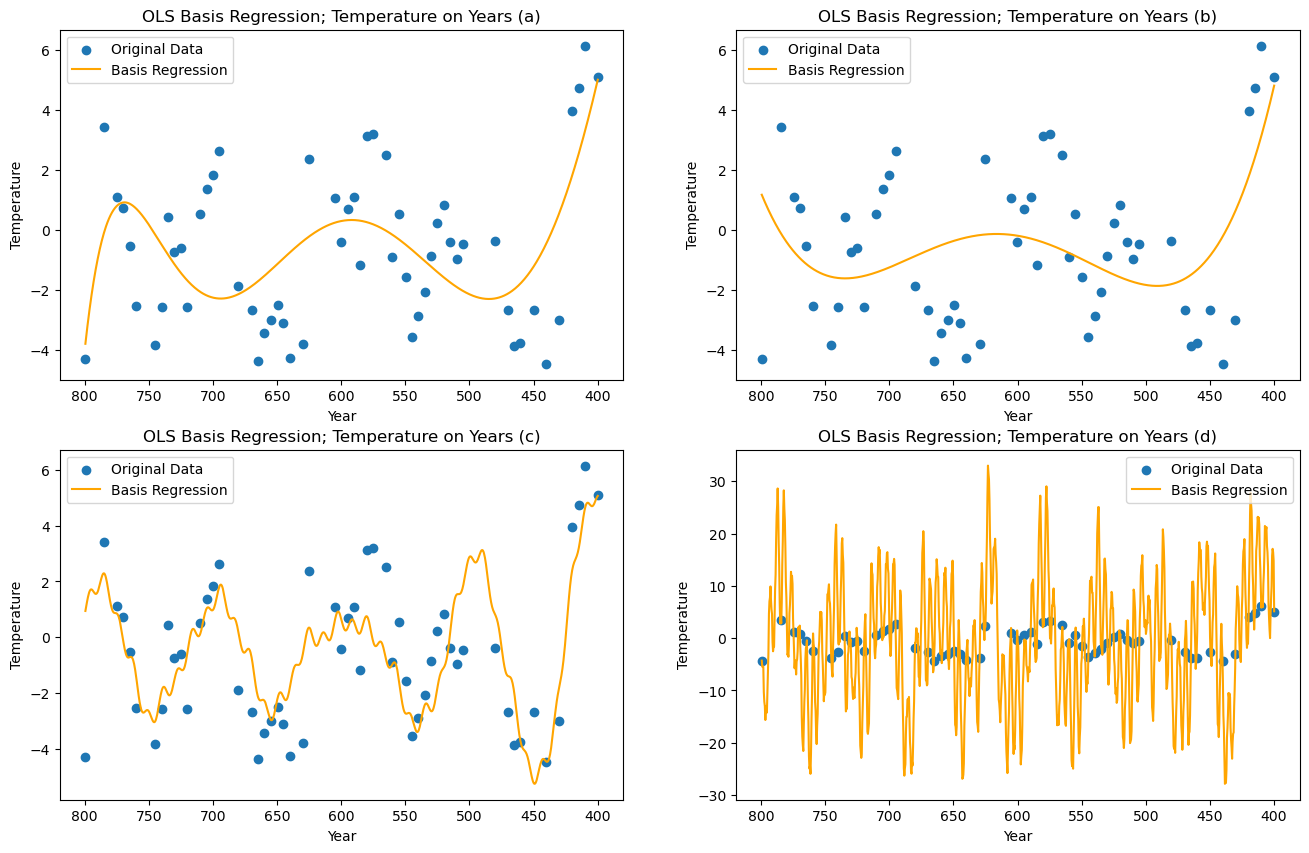

In [205]:
_, ax = plt.subplots(2,2, figsize = (16,10))

for i, part in enumerate(['a', 'b', 'c' ,'d']):
  # Plotting the original data
  
  ax[i//2, i%2].scatter(year_train, temp_train, label = "Original Data")
  ax[i//2, i%2].set_xlabel("Year")
  ax[i//2, i%2].set_ylabel("Temperature")
  ax[i//2, i%2].set_title(f"OLS Basis Regression; Temperature on Years ({part})")
  ax[i//2, i%2].invert_xaxis()

  xs = np.linspace(year_train.min(), year_train.max(), 1000)

  # TODO: plot your functions for the specified xs
  w = find_weights(make_basis(year_train, part), temp_train)
  y_pred = [np.dot(w, make_basis(x, part)) for x in xs]
  ax[i//2, i%2].plot(xs, y_pred, color = 'orange', label = "Basis Regression")


  ax[i//2, i%2].legend()

plt.savefig("images/p3.1.png")
  


## Problem 3 Subpart 2

In [206]:
def mean_squared_error(X,y, w):
  # TODO: Given a linear regression model with parameter w, compute and return the
  # mean squared error.
  assert(len(X) == len(y))

  sum = np.sum(np.dot((y - np.dot(X, w.T)).T, y - np.dot(X, w.T)))
  return sum/len(X)

def negative_log_likelihood(X,y,w, sigma):
  # TODO: Given a probabilistic linear regression model y = w^T x + e, where
  # e is N(0, sigma), return the negative log likelihood of the data X,y.
  return len(y)*np.log(sigma*np.sqrt(2*np.pi)) + len(y)/(2*np.square(sigma))*mean_squared_error(X,y, w)


In [207]:
for part in ['a', 'b', 'c', 'd']:
  # TODO: compute the MSE and Likelihood and print the results
  w = find_weights(make_basis(year_train, part), temp_train)
  train_mse = mean_squared_error(make_basis(year_train, part), temp_train, w)
  test_mse = mean_squared_error(make_basis(year_test, part), temp_test, w)
  
  print(f"\nPart ({part});\n\n Train MSE: {train_mse:.2f}; Test MSE: {test_mse:.2f}\n")
  
  # TODO: compute the likelihood. 
  train_log_nll = negative_log_likelihood(make_basis(year_train, part), temp_train, w, np.sqrt(train_mse))
  test_log_nll = negative_log_likelihood(make_basis(year_test, part), temp_test, w, np.sqrt(train_mse))
  print(f" Train Negative Log-Likelihood: {train_log_nll:.3f}; Test Negative Log-Likelihood: {test_log_nll:.3f}")


Part (a);

 Train MSE: 4.83; Test MSE: 7.96

 Train Negative Log-Likelihood: 125.768; Test Negative Log-Likelihood: 63.256

Part (b);

 Train MSE: 5.53; Test MSE: 8.71

 Train Negative Log-Likelihood: 129.620; Test Negative Log-Likelihood: 64.035

Part (c);

 Train MSE: 2.88; Test MSE: 5.97

 Train Negative Log-Likelihood: 111.018; Test Negative Log-Likelihood: 62.098

Part (d);

 Train MSE: 0.64; Test MSE: 58.91

 Train Negative Log-Likelihood: 68.303; Test Negative Log-Likelihood: 1162.250
